In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the cleaned files

In [ ]:
youtube_channels = pd.read_csv("/content/YTchannels.csv")
music_artists = pd.read_csv("/content/MusicArtists.csv")
youtube_videos = pd.read_csv("/content/YTvideos.csv")
songs = pd.read_csv("/content/Songs.csv")
videos_history = pd.read_csv("/content/videos_history.csv")
music_history = pd.read_csv("/content/music_history.csv")
youtube_history_2023 = pd.read_csv("/content/youtube_history_2023.csv")

# Let's have some FUN!

## YOUTUBE MUSIC

### Top 10 Artists

In [ ]:
music_artists.sort_values(by = 'freq', ascending=False)[['name', 'freq']].head(10)

,name,freq
18,Taylor Swift - Topic,989
12,Harry Styles - Topic,218
28,Prateek Kuhad - Topic,131
44,Louis Tomlinson - Topic,127
20,Olivia Rodrigo - Topic,114
209,Noah Kahan - Topic,106
57,5 Seconds of Summer - Topic,105
85,Arijit Singh - Topic,101
3,One Direction - Topic,96
36,The 1975 - Topic,88


### Top Artist of Every Month

In [ ]:
"""
from music_history
group by artist_name, month
count number of rows
order by count
pick artist_name correspoding to max count for each month
"""
music_history = pd.read_csv("/content/music_history.csv")
# Group by 'artist_name' and 'month', count rows, and sort by count in descending order
grouped_df = music_history.groupby(['name_of_channel', 'month']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Select the top row for each month
result_df = grouped_df.groupby('month').first().reset_index()

print(result_df)

   month                name_of_channel  count
0    Apr           Taylor Swift - Topic    120
1    Aug           Taylor Swift - Topic     33
2    Dec           Taylor Swift - Topic    103
3    Feb           Taylor Swift - Topic     36
4    Jan           Taylor Swift - Topic     78
5    Jul           Taylor Swift - Topic      9
6    Jun           Taylor Swift - Topic     33
7    Mar  Daisy Jones & The Six - Topic     44
8    May               The 1975 - Topic     51
9    Nov           Taylor Swift - Topic    259
10   Oct           Taylor Swift - Topic    191
11   Sep           Taylor Swift - Topic     69


### Number of Different Artists I listened to

In [ ]:
len(music_artists['name'].unique())

702

### Top 10 Songs

In [ ]:
songs.sort_values(by = 'freq', ascending=False)[['name_song', 'freq', 'artist_key']].head(10)

,name_song,freq,artist_key
1929,champagne problems,34,https://www.youtube.com/channel/UCPC0L1d253x-K...
939,Little Freak,29,https://www.youtube.com/channel/UCVacQ2t5GUZ2t...
380,Daylight,27,https://www.youtube.com/channel/UCPC0L1d253x-K...
1243,Paris,26,https://www.youtube.com/channel/UCQgUHOPJJrmzC...
1408,Satellite,26,https://www.youtube.com/channel/UCVacQ2t5GUZ2t...
338,Cornelia Street,24,https://www.youtube.com/channel/UCPC0L1d253x-K...
1101,Mystery of Love,21,https://www.youtube.com/channel/UC5sOhxfts379l...
848,Keep Driving,21,https://www.youtube.com/channel/UCVacQ2t5GUZ2t...
26,ADHOORE,21,https://www.youtube.com/channel/UCe223VU7Yb2pR...
1666,The Night We Met,20,https://www.youtube.com/channel/UCHIqmk90GKurd...


### Number of Different Songs I listened to

In [ ]:
print(len(songs['name_song'].unique()))
print(len(songs))

2067
2067


### Total Number of Songs I listened to

In [ ]:
sum(songs['freq'])

5338

### Number of Minutes I listened to Music

In [ ]:
songs['duration_x_freq'] = songs['duration']*songs['freq']
total_mins = round(sum(songs['duration_x_freq']))
hours, mins = total_mins//60, total_mins%60
days, hours1 = hours//24, hours%24
print(f"I listened to music for \n{total_mins} minutes that is \n{hours} Hours & {mins} minutes that is \n{days} Days, {hours1} Hours & {mins} minutes that is \nHALF A MONTH OF 2023!")

I listened to music for 
20974 minutes that is 
349 Hours & 34 minutes that is 
14 Days, 13 Hours & 34 minutes that is 
HALF A MONTH OF 2023!


### Number of Minutes I listened to Taylor Swift

In [ ]:
merged_df = pd.merge(songs, music_artists, left_on='artist_key', right_on='url')
# result_df = merged_df.groupby('url')['duration_x_freq'].sum()
# result_df

target_name = 'Taylor Swift - Topic'
# Filter the merged DataFrame based on the specified 'name'
filtered_df = merged_df[merged_df['name'] == target_name]

# Calculate the sum of 'duration_x_freq' for the filtered entries
sum_duration_x_freq = filtered_df['duration_x_freq'].sum()

total_mins = round(sum_duration_x_freq)
hours, mins = total_mins//60, total_mins%60
days, hours1 = hours//24, hours%24
print(f"I listened to Taylor Swift for \n{total_mins} minutes that is \n{hours} Hours & {mins} minutes that is \n{days} Days, {hours1} Hours & {mins} minutes!")


I listened to Taylor Swift for 
4044 minutes that is 
67 Hours & 24 minutes that is 
2 Days, 19 Hours & 24 minutes!


### My Top 10 Taylor Swift Songs

In [ ]:
print(len(filtered_df[['name_song', 'freq_x', 'name']]))
filtered_df[['name_song', 'freq_x', 'name']].sort_values(by = 'freq_x', ascending=False).head(10)

185


,name_song,freq_x,name
148,champagne problems,34,Taylor Swift - Topic
43,Daylight,27,Taylor Swift - Topic
38,Cornelia Street,24,Taylor Swift - Topic
9,"""Slut!"" (Taylor's Version) (From The Vault)",20,Taylor Swift - Topic
177,right where you left me (bonus track),20,Taylor Swift - Topic
140,"You're On Your Own, Kid",18,Taylor Swift - Topic
57,Getaway Car,17,Taylor Swift - Topic
142,august,17,Taylor Swift - Topic
106,Say Don't Go (Taylor's Version) (From The Vault),16,Taylor Swift - Topic
136,"Would've, Could've, Should've",15,Taylor Swift - Topic


### Champagne Probrems FR

In [ ]:
music_history.loc[(music_history['name_of_video'] == 'champagne problems') & (music_history['month'] == 'Jan'), ['name_of_video', 'date', 'month', 'day']].sort_values(by = ['day'])

,name_of_video,date,month,day
2172,champagne problems,12 Jan 2023,Jan,12
2014,champagne problems,20 Jan 2023,Jan,20
1974,champagne problems,27 Jan 2023,Jan,27
1936,champagne problems,29 Jan 2023,Jan,29


I first listened to Champagne problems in 2023 on 'January 12'

month
Apr    6
Aug    1
Dec    9
Jan    4
Jun    3
Nov    6
Oct    2
Sep    3
dtype: int64


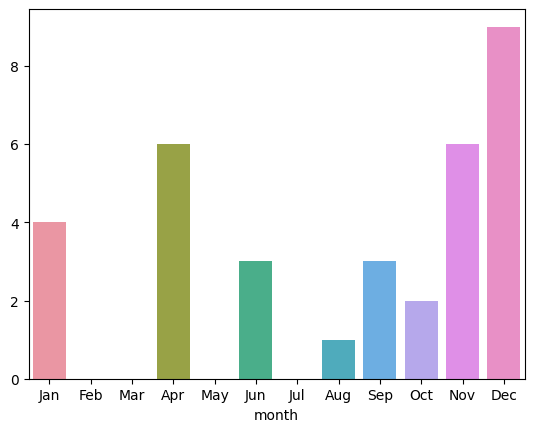

In [ ]:
result_df = music_history.loc[(music_history['name_of_video'] == 'champagne problems'), ['name_of_video', 'date', 'month', 'day']].groupby('month').size()
print(result_df)# index and values (series)
to_plot = pd.DataFrame(result_df)

custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x = result_df.index, y = result_df, order = custom_order)
plt.show()

### How many times did I listen to All Too Well?

In [ ]:
all_too_wells = songs[songs['name_song'].str.contains('All too Well', case=False)]
all_too_wells[['name_song', 'freq']]

,name_song,freq
81,All Too Well,3
82,All Too Well (10 Minute Version) (Taylor's Ver...,15
83,All Too Well (10 Minute Version) (Taylor's Ver...,1
84,All Too Well (Sad Girl Autumn Version) - Recor...,11
85,All Too Well (Taylor's Version),2


In [ ]:
print("I listened to ATW TMV TV 27 times!! 🤡")

I listened to ATW TMV TV 27 times!! 🤡


### Consumption over the months

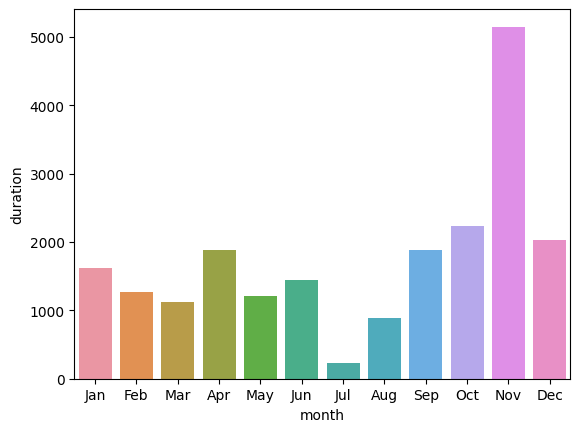

In [ ]:
"""
select month, sum(duration)
from
music_history left join songs on url_of_song
group by month
"""
# print(len(music_history))
music_history = pd.read_csv('/content/music_history.csv')
merged_df = pd.merge(music_history, songs, left_on='name_of_video', right_on='name_song', how='left')
# print(len(merged_df))

# Group by 'month' and calculate the sum of 'duration_x_freq'
result_df = merged_df.groupby('month')['duration'].sum().reset_index()
# print(sum(result_df['duration']))
# print(result_df.sort_values(by = 'duration', ascending=False))
# merged_df.sort_values(by = 'name_of_video')
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x = 'month', y= 'duration', data = result_df, order = custom_order)
plt.show()

In [ ]:
result_df

,month,duration
0,Apr,1890.400000
1,Aug,891.216667
2,Dec,2027.866667
3,Feb,1262.316667
4,Jan,1626.383333
5,Jul,228.200000
6,Jun,1446.116667
7,Mar,1128.983333
8,May,1204.650000
9,Nov,5150.200000


### Top 10 days (by minutes)

In [ ]:
"""
select month, sum(duration)
from
music_history left join songs on name_of_song
group by date
"""
# print(len(music_history))
music_history = pd.read_csv("/content/music_history.csv")
merged_df = pd.merge(music_history, songs, left_on='name_of_video', right_on='name_song', how='left')
# print(len(merged_df))

# Group by 'month' and calculate the sum of 'duration_x_freq'
result_df = merged_df.groupby('date')['duration'].sum().reset_index()
# print(sum(result_df['duration']))
result_df.sort_values(by = 'duration', ascending=False).head(10)
# merged_df.sort_values(by = 'name_of_video')
# sns.barplot(x = 'month', y= 'duration', data = result_df, order = custom_order)
# plt.show()

,date,duration
206,7 Nov 2023,854.433333
29,12 Oct 2023,314.816667
221,9 Nov 2023,313.383333
35,13 Nov 2023,300.916667
20,11 Oct 2023,277.050000
99,21 Nov 2023,267.933333
214,8 Nov 2023,258.400000
132,26 May 2023,254.050000
13,10 Nov 2023,252.000000
150,28 Mar 2023,236.066667


### Listening trend over the year

In [ ]:
# Define a mapping dictionary from month names to numbers
month_name_to_number = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sept': 9,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Use the map function to replace month names with numbers
music_history = pd.read_csv("/content/music_history.csv")
music_history['month'] = music_history['month'].map(month_name_to_number)

In [ ]:
date = '7 Nov 2023'
date[-8:-5]

'Nov'

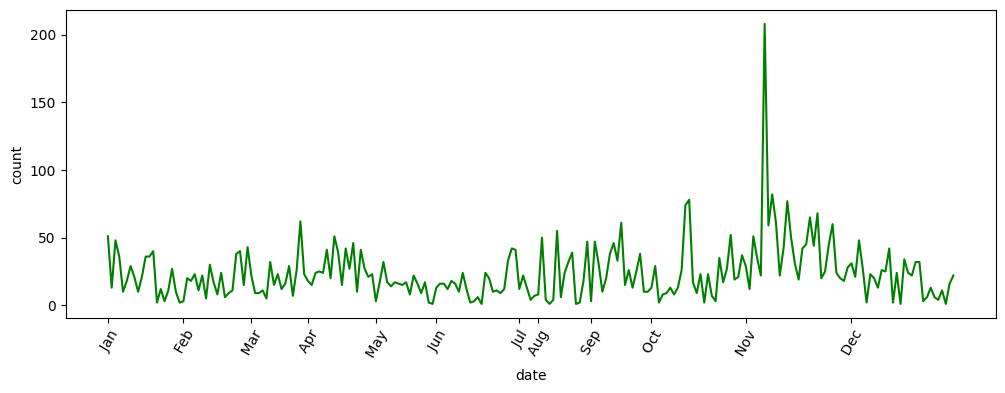

In [ ]:
plt.figure(figsize=(12,4))
aggregated = music_history[['date', 'month', 'day', 'source']].sort_values(by = ['month', 'day']).groupby('date', as_index=False, sort = False).agg(count=("source", "count"))
aggregated

# sns.set_style(rc = {'axes.facecolor': 'white'})
sns.lineplot(data = aggregated, x = 'date', y = 'count', color = 'green')
locs, labels = plt.xticks()
locations = []
labs = []
for i in range(len(locs)):
  if str(labels[i])[-11:-7] in labs:
    continue
  elif str(labels[i])[-11:-7] != "Sept":
    labs.append(str(labels[i])[-11:-7])
    locations.append(locs[i])

plt.xticks(locations, labs, rotation=60)
# print(labs)
plt.show()
# aggregated.sort_values(by = ['month', 'day'])[['date', 'name_of_video', 'name_of_channel']].head(5)

In [ ]:
#save plot with transparent background
# plt.savefig('my_plot.png', transparent=True)

In [ ]:
# merged_df[merged_df['date'] == '7 Nov 2023'].sort_values(by = ['AM/PM' ,'hour', 'minute', 'second'], ascending = [True, True, True, True])

---
---
## YOUTUBE VIDEOS
---
---

### Number of Channeles I viewed videos from

In [ ]:
len(youtube_channels['name'].unique())

488

### Top 10 YouTube Channels

In [ ]:
youtube_channels.loc[youtube_channels['name'] != 'name_chan' ,['name', 'freq']].sort_values(by = 'freq', ascending=False).head(10)

,name,freq
311,ActionKid,55
9,Tanmay Bhat,54
283,Strolling The City,50
7,Taylor Bell,41
322,TaylorSwiftVEVO,34
280,New Walker,25
242,Walking Commuter,22
50,HarryStylesVEVO,20
292,THE TABLE,19
53,Singh in USA,17


### Number of Videos I watched in 2023 (once)

In [ ]:
len(youtube_videos)

1216

### Number of Minutes I spent on YouTube

In [ ]:
youtube_videos[['name_vid', 'duration', 'freq']].sort_values(by = 'duration', ascending=False).head(20)
# realistically, I did not watch 8 hour long videos to their entirity. So I'll cap the duration at 300 mins
youtube_videos = youtube_videos[youtube_videos['duration'] <= 300]

In [ ]:
youtube_videos['duration_x_freq'] = youtube_videos['duration']*youtube_videos['freq']

total_mins = round(sum(youtube_videos['duration_x_freq']))
hours, mins = total_mins//60, total_mins%60
days, hours1 = hours//24, hours%24
print(f"I watched videos for \n{total_mins} minutes that is \n{hours} Hours & {mins} minutes that is \n{days} Days, {hours1} Hours & {mins} minutes that is \nALMOST ONE WHOLE MONTH OF 2023!")

I watched videos for 
35025 minutes that is 
583 Hours & 45 minutes that is 
24 Days, 7 Hours & 45 minutes that is 
ALMOST ONE WHOLE MONTH OF 2023!


<ipython-input-59-9bdbd45fb4ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_videos['duration_x_freq'] = youtube_videos['duration']*youtube_videos['freq']


### Watch Time over the months

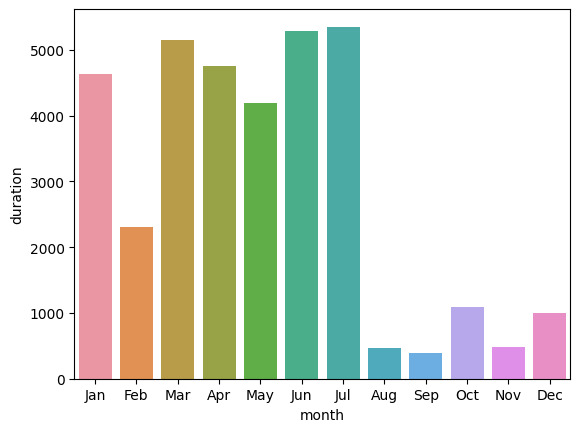

In [ ]:
merged_df = pd.merge(videos_history, youtube_videos, left_on='name_of_video', right_on='name_vid', how = 'left')
result_df = merged_df.groupby('month')['duration'].sum().reset_index()
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x = 'month', y= 'duration', data = result_df, order = custom_order)
plt.show()

In [ ]:
result_df

,month,duration
0,Apr,4756.600000
1,Aug,469.350000
2,Dec,1006.216667
3,Feb,2310.333333
4,Jan,4631.400000
5,Jul,5352.200000
6,Jun,5290.600000
7,Mar,5156.800000
8,May,4199.316667
9,Nov,476.233333
